In [7]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo = pd.read_csv("CADASTRO_CURSOS_2020.CSV", encoding="latin-1", delimiter=";")

display(arquivo)

C:\Users\Nubia\AppData\Local\Temp\ipykernel_17352\1617399868.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  arquivo = pd.read_csv("CADASTRO_CURSOS_2020.CSV", encoding="latin-1", delimiter=";")


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,MAT_APOIO_SOCIAL,CONC_APOIO_SOCIAL,ATIV_EXTRACURRICULAR,ING_ATIV_EXTRACURRICULAR,MAT_ATIV_EXTRACURRICULAR,CONC_ATIV_EXTRACURRICULAR,MOB_ACADEMICA,ING_MOB_ACADEMICA,MAT_MOB_ACADEMICA,CONC_MOB_ACADEMICA
0,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335624,2020,Exterior,7,Exterior,NaN,71,Exterior,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0
335625,2020,Exterior,7,Exterior,NaN,71,Exterior,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0
335626,2020,Exterior,7,Exterior,NaN,71,Exterior,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0
335627,2020,Exterior,7,Exterior,NaN,71,Exterior,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0


<Figure size 800x600 with 0 Axes>

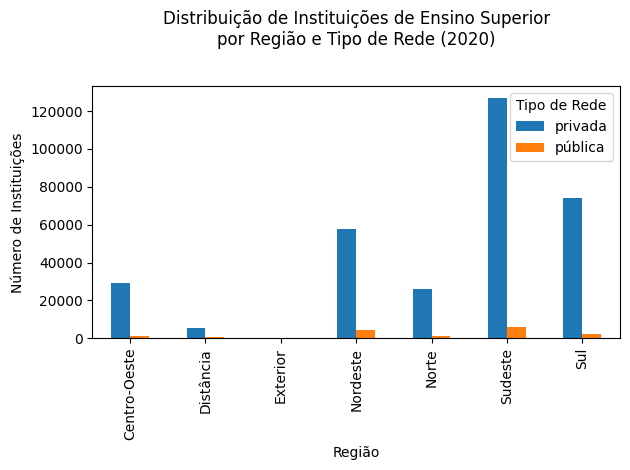

,NO_REGIAO,TP_REDE,unidades
0,Centro-Oeste,pública,1379
1,Centro-Oeste,privada,29442
2,Distância,pública,523
3,Distância,privada,5432
4,Exterior,privada,214
5,Nordeste,pública,4381
6,Nordeste,privada,57566
7,Norte,pública,1251
8,Norte,privada,25976
9,Sudeste,pública,6137


In [8]:
por_regiao = arquivo.groupby(["NO_REGIAO", "TP_REDE"]).size().reset_index(name='unidades')

# Dicionário pra mapear os numeros para rótulos "pública" e "privada"
rotulo = {1: 'pública', 2: 'privada'}

# Mapeando os rótulos 
por_regiao['TP_REDE'] = por_regiao['TP_REDE'].map(rotulo)

plt.figure(figsize=(8, 6))  # figsize indica o tamanho da figura

# Criar gráfico de barras não empilhadas (lado a lado)
por_regiao.pivot(index="NO_REGIAO", columns="TP_REDE", values='unidades').plot(kind='bar', stacked=False)

#características do gráfico
plt.title('Distribuição de Instituições de Ensino Superior\npor Região e Tipo de Rede (2020)', pad=30, loc= 'center')
plt.xlabel('Região')
plt.ylabel('Número de Instituições')
plt.legend(title='Tipo de Rede', loc='upper right')
plt.tight_layout()# Ajuste do layout para evitar sobreposição
plt.savefig("Gráfico_região.png")
plt.show()

display(por_regiao)

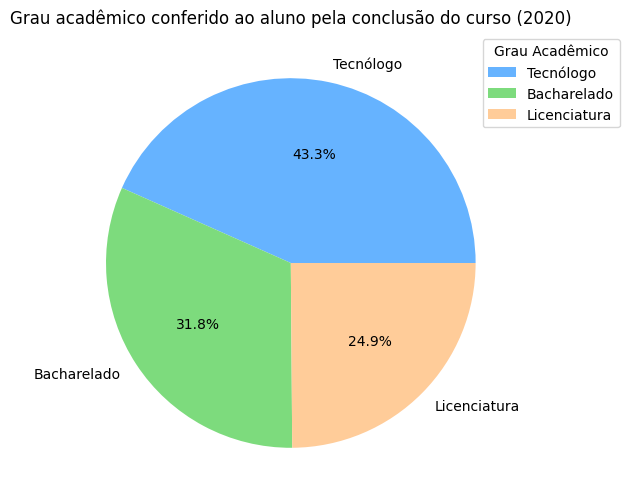

In [3]:
graus = {1: 'Bacharelado', 2: 'Licenciatura', 3: 'Tecnólogo', 4: 'Bacharelado e Licenciatura'} #dicionario p/ as novas categorias

# Agrupamento e contagem por meio do value_counts (ele conta como frequencia)
por_grau = arquivo['TP_GRAU_ACADEMICO'].value_counts(normalize=True) * 100

# validando as categorias 
por_grau.index = por_grau.index.map(graus)

# montando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(por_grau, labels=por_grau.index, autopct='%1.1f%%', colors=['#66b3ff', '#7ddb7d', '#ffcc99', '#ff9999'])
plt.title("Grau acadêmico conferido ao aluno pela conclusão do curso (2020)", fontsize=12)
plt.legend(title="Grau Acadêmico", loc= 'upper left', bbox_to_anchor=(0.90, 1.00) )
#a ordem importa pro grafico sair
plt.savefig("Gráfico_grau.png")
plt.show()


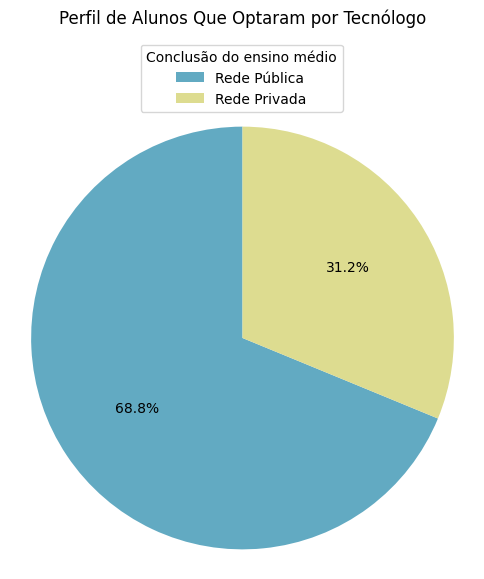

In [4]:
grau = arquivo.groupby(['TP_GRAU_ACADEMICO', 'MAT_PROCESCPUBLICA', 'MAT_PROCESCPRIVADA']).size().reset_index(name='Contagem')

# Filtrar apenas os tecnólogos (TP_GRAU_ACADEMICO == 3)
trancados = grau[grau['TP_GRAU_ACADEMICO'] == 3]  # 3 é tecnólogo, 1 é bacharelado

# Calcular o total de trancamentos por tipo de escola
total_publico = trancados[trancados['MAT_PROCESCPUBLICA'] > 0]['Contagem'].sum()
total_privado = trancados[trancados['MAT_PROCESCPRIVADA'] > 0]['Contagem'].sum()

# Calcular a porcentagem
total_geral = total_publico + total_privado
porcentagem_publico = (total_publico / total_geral) * 100
porcentagem_privado = (total_privado / total_geral) * 100

# Criar um DataFrame para o gráfico (utilizar quando quiser reduzir pra algo especifico e gerar uma nova planilha)
dados_grafico = pd.DataFrame({
    'Rede': ['Rede Pública', 'Rede Privada'],
    'Porcentagem': [porcentagem_publico, porcentagem_privado]
})

# Criar o gráfico de pizza sem os rótulos
plt.figure(figsize=(6, 6))
plt.pie(dados_grafico['Porcentagem'], autopct='%1.1f%%', colors=['#62AAC2', '#DDDC90'], startangle=90)
plt.legend(dados_grafico['Rede'], title='Conclusão do ensino médio', loc='upper right', bbox_to_anchor=(0.73, 1.15) )
plt.title('Perfil de Alunos Que Optaram por Tecnólogo', loc='center', pad=60)
plt.axis('equal')
plt.savefig("Gráfico_perfil_tecnologo.png", bbox_inches='tight')
plt.show()

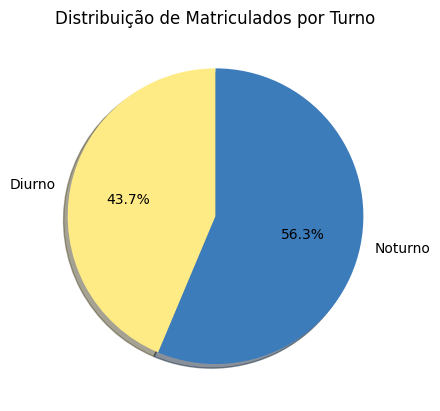

In [5]:
matriculados_turno = arquivo[['QT_MAT_DIURNO', 'QT_MAT_NOTURNO']].sum()

rotulo = {'QT_MAT_DIURNO': 'Diurno', 'QT_MAT_NOTURNO': 'Noturno'}


# Criando o gráfico de pizza
plt.pie(matriculados_turno, labels= matriculados_turno.index.map(rotulo), autopct='%1.1f%%', colors=['#FFEB85', '#3D7CBB'] , shadow = True,  startangle=90)
plt.title('Distribuição de Matriculados por Turno')
plt.savefig("turno.png")
plt.show()


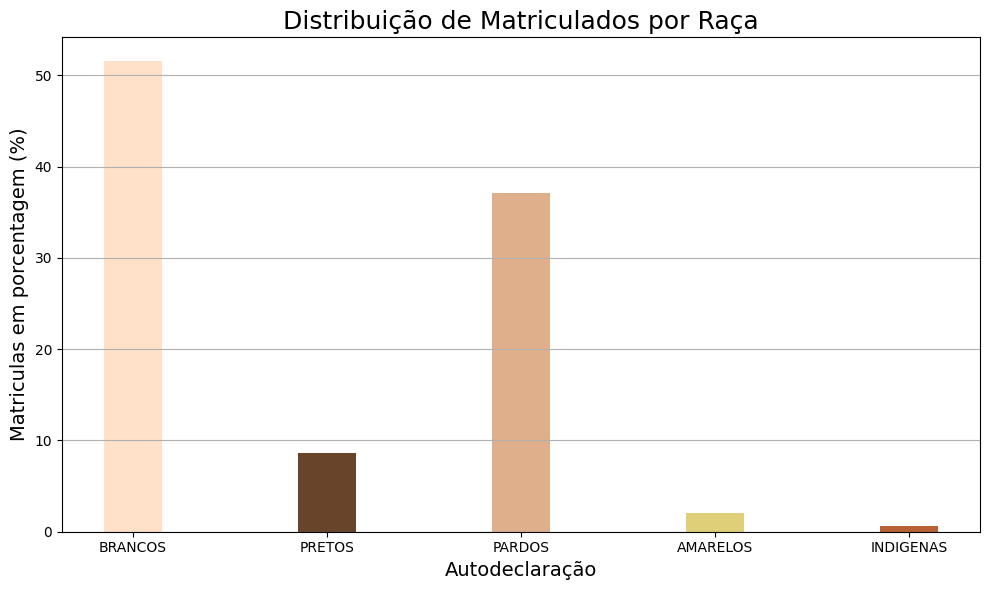

In [6]:
matriculados_etnia = arquivo[['MAT_BRANCA', 'MAT_PRETA', 'MAT_PARDA', 'MAT_AMARELA', 'MAT_INDIGENA']].sum()

rotulo = {'MAT_BRANCA': 'BRANCOS', 'MAT_PRETA' : 'PRETOS', 'MAT_PARDA': 'PARDOS', 'MAT_AMARELA': 'AMARELOS', 'MAT_INDIGENA': 'INDIGENAS' }


total = matriculados_etnia.sum()
porcentagens = matriculados_etnia / total * 100

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(rotulo.values(), porcentagens, color=['#FFE0C8', '#68442B', '#DEAF8A', '#DFCF78', '#B86135'], width=0.3)
plt.xlabel('Autodeclaração', fontsize=14)
plt.ylabel('Matriculas em porcentagem (%)', fontsize=14)
plt.title('Distribuição de Matriculados por Raça' , fontsize=18)
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização 0 equivale a angulo reto
plt.grid(axis='y')  # Adiciona linhas de grade no eixo y
plt.tight_layout()
plt.savefig("Gráfico_raca.png")
plt.show()

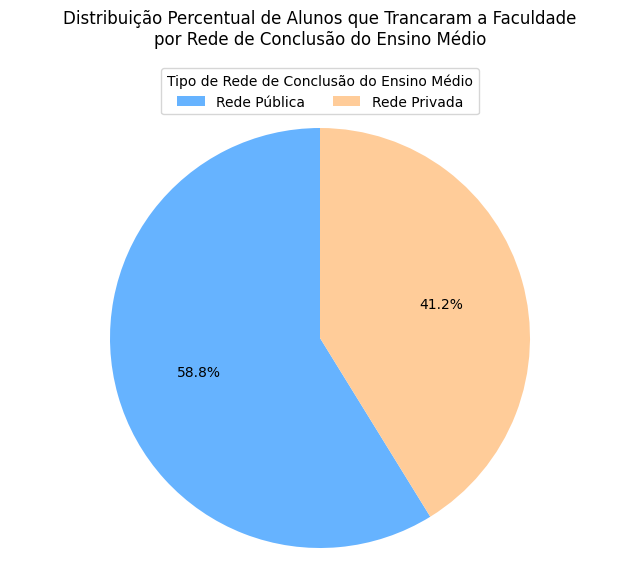

In [243]:
rede_evasao = arquivo.groupby(['SIT_TRANCADA', 'MAT_PROCESCPUBLICA', 'MAT_PROCESCPRIVADA']).size().reset_index(name='Contagem')

# Filtra apenas valores onde houve trancamento
trancados = rede_evasao[rede_evasao['SIT_TRANCADA'] > 0]

#total de trancamentos por tipo de rede (pública ou privada)
total_publico = trancados[trancados['MAT_PROCESCPUBLICA'] > 0]['Contagem'].sum()
total_privado = trancados[trancados['MAT_PROCESCPRIVADA'] > 0]['Contagem'].sum()

#porcentagem de trancamentos por tipo de rede
total_geral = rede_evasao['Contagem'].sum()
porcentagem_publico = (total_publico / total_geral) * 100
porcentagem_privado = (total_privado / total_geral) * 100

#DataFrame para o gráfico
dados_grafico = pd.DataFrame({
    'Rede': ['Rede Pública', 'Rede Privada'],
    'Porcentagem': [porcentagem_publico, porcentagem_privado]
})

# caracteristicas p criar o gráfico de pizza sem rótulos nas fatias e com legenda para os tipos de rede
plt.figure(figsize=(8, 6))  # Tamanho do gráfico
plt.pie(dados_grafico['Porcentagem'], labels=None, autopct='%1.1f%%', colors=['#66b3ff', '#ffcc99'], startangle=90)
plt.title('Distribuição Percentual de Alunos que Trancaram a Faculdade\npor Rede de Conclusão do Ensino Médio', pad=45)

plt.legend(dados_grafico['Rede'], title='Tipo de Rede de Conclusão do Ensino Médio', loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=2)
plt.axis('equal')
plt.savefig("Gráfico_evasao.png", bbox_inches='tight')  # tight Ajusta a área salva para incluir o título e a legenda

# Exibir o gráfico
plt.show()

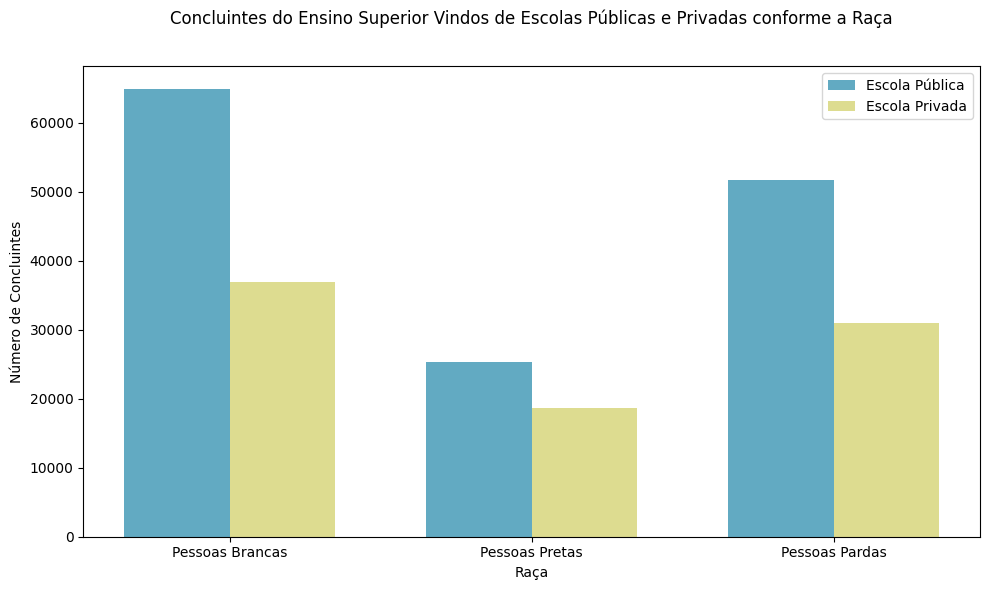

In [220]:
apoio_cor = arquivo.groupby(['CONC_BRANCA', 'CONC_PRETA', 'CONC_PARDA', 'CONC_PROCESCPUBLICA', 'CONC_PROCESCPRIVADA']).size().reset_index(name='Contagem')

# Filtra apenas os casos onde 'CONC_PROCESCPUBLICA' ou 'CONC_PROCESCPRIVADA' > 0 (concluintes por tipo de escola)
apoio = apoio_cor[(apoio_cor['CONC_PROCESCPUBLICA'] > 0) | (apoio_cor['CONC_PROCESCPRIVADA'] > 0)]

# Calcula o total de concluintes por cor em escolas públicas
total_branca_publica = apoio[(apoio['CONC_BRANCA'] > 0) & (apoio['CONC_PROCESCPUBLICA'] > 0)]['Contagem'].sum()
total_preta_publica = apoio[(apoio['CONC_PRETA'] > 0) & (apoio['CONC_PROCESCPUBLICA'] > 0)]['Contagem'].sum()
total_parda_publica = apoio[(apoio['CONC_PARDA'] > 0) & (apoio['CONC_PROCESCPUBLICA'] > 0)]['Contagem'].sum()

# Calcular o total de concluintes por cor em escolas privadas
total_branca_privada = apoio[(apoio['CONC_BRANCA'] > 0) & (apoio['CONC_PROCESCPRIVADA'] > 0)]['Contagem'].sum()
total_preta_privada = apoio[(apoio['CONC_PRETA'] > 0) & (apoio['CONC_PROCESCPRIVADA'] > 0)]['Contagem'].sum()
total_parda_privada = apoio[(apoio['CONC_PARDA'] > 0) & (apoio['CONC_PROCESCPRIVADA'] > 0)]['Contagem'].sum()

# Cria um DataFrame para o gráfico
dados_grafico = pd.DataFrame({
    'Raça': ['Pessoas Brancas', 'Pessoas Pretas', 'Pessoas Pardas'],
    'Escola Pública': [total_branca_publica, total_preta_publica, total_parda_publica],
    'Escola Privada': [total_branca_privada, total_preta_privada, total_parda_privada]
})


largura = 0.35  # Largura das barras
ind = range(len(dados_grafico['Raça']))  # Índices para as barras

plt.figure(figsize=(10, 6))  # Tamanho 

# barras - escola pública e privada
plt.bar(ind, dados_grafico['Escola Pública'], width=largura, label='Escola Pública', color='#62AAC2')
plt.bar([i + largura for i in ind], dados_grafico['Escola Privada'], width=largura, label='Escola Privada', color='#DDDC90')
plt.xlabel('Raça')
plt.ylabel('Número de Concluintes')
plt.title('Concluintes do Ensino Superior Vindos de Escolas Públicas e Privadas conforme a Raça', pad=30)

# Adicionar legendas 
plt.xticks([i + largura/2 for i in ind], dados_grafico['Raça'])  # Posicionar os rótulos de X no meio
plt.legend()
plt.tight_layout()
plt.savefig("Gráfico_concluintes.png")

# Exibir o gráfico
plt.show()